In [213]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [214]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS = 3
EPOCH = 40

In [215]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [216]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [217]:
len(dataset)

68

In [218]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[0 0 0 0 1 0 1 2 1 2 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 1 0 1]
[[[185. 180. 187.]
  [180. 175. 182.]
  [179. 174. 181.]
  ...
  [125. 120. 126.]
  [120. 115. 121.]
  [116. 111. 117.]]

 [[181. 176. 183.]
  [179. 174. 181.]
  [180. 175. 182.]
  ...
  [129. 124. 130.]
  [125. 120. 126.]
  [120. 115. 121.]]

 [[178. 173. 180.]
  [178. 173. 180.]
  [180. 175. 182.]
  ...
  [142. 137. 143.]
  [144. 139. 145.]
  [140. 135. 141.]]

 ...

 [[175. 169. 171.]
  [178. 172. 174.]
  [180. 174. 176.]
  ...
  [125. 119. 121.]
  [122. 116. 118.]
  [120. 114. 116.]]

 [[170. 164. 166.]
  [175. 169. 171.]
  [179. 173. 175.]
  ...
  [133. 127. 129.]
  [129. 123. 125.]
  [127. 121. 123.]]

 [[161. 155. 157.]
  [169. 163. 165.]
  [178. 172. 174.]
  ...
  [140. 134. 136.]
  [138. 132. 134.]
  [137. 131. 133.]]]


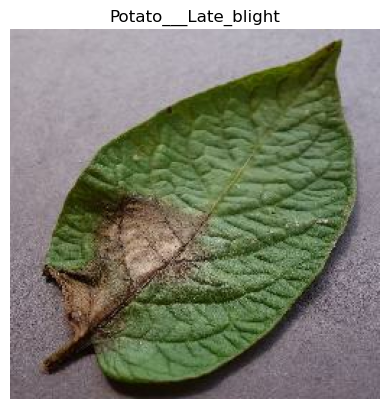

In [219]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8")) 
    plt.axis("off")
    plt.title(class_names[label_batch[0]])
    

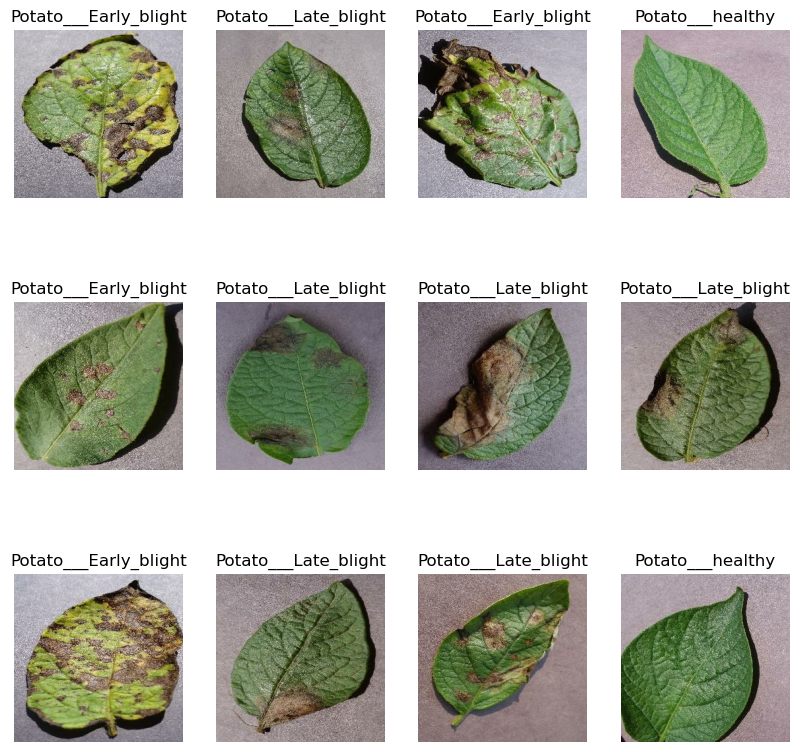

In [220]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        axs = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) 
        plt.axis("off")
        plt.title(class_names[label_batch[i]])
    

In [221]:
train_size=0.8
len(dataset)*train_size

54.400000000000006

In [222]:
train_ds = dataset.take(54)
len(train_ds)

54

In [223]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [224]:
val_size=0.1
len(dataset)* val_size

6.800000000000001

In [225]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [226]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [227]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    
    if shuffle:
        ds.shuffle(shuffle_size,seed=12)
    
    ds_size=len(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds =ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds,test_ds

In [228]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [229]:
len(train_ds)

54

In [230]:
len(val_ds)

6

In [231]:
len(test_ds)

8

In [232]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [233]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.Rescaling(1.0/255.0),
])

In [234]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("vertical_and_horizontal"),
    layers.RandomRotation(0.2),
])

In [235]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])

model.build(input_shape=input_shape)

In [236]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_11 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_12 (Sequential)           │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [258]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

In [238]:
history = model.fit(
    train_ds,
    epochs=EPOCH,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds,
    
)

Epoch 1/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 625ms/step - accuracy: 0.5017 - loss: 0.9117 - val_accuracy: 0.6719 - val_loss: 0.7196
Epoch 2/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 33s 615ms/step - accuracy: 0.7269 - loss: 0.6064 - val_accuracy: 0.8750 - val_loss: 0.3042
Epoch 3/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 600ms/step - accuracy: 0.8747 - loss: 0.3112 - val_accuracy: 0.7708 - val_loss: 0.4952
Epoch 4/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 31s 575ms/step - accuracy: 0.8992 - loss: 0.2618 - val_accuracy: 0.5729 - val_loss: 1.7889
Epoch 5/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 653ms/step - accuracy: 0.8992 - loss: 0.2436 - val_accuracy: 0.9531 - val_loss: 0.1110
Epoch 6/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 601ms/step - accuracy: 0.9472 - loss: 0.1419 - val_accuracy: 0.9167 - val_loss: 0.2377
Epoch 7/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 30s 564ms/step - accuracy: 0.9590 - loss: 0.1137 - val_accuracy: 0.9531 - val_loss: 0.1222
Epoch 8/40
54/54 ━━━━━━━━━━━━━━━━━━━━ 32s 589ms/step - accuracy: 0.9597 - loss: 0.1113 - val_accu

In [239]:
scores = model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9621 - loss: 0.0813


In [240]:
scores

[0.07777370512485504, 0.9655172228813171]

In [241]:
history.params

{'verbose': 1, 'epochs': 40, 'steps': 54}

In [242]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [243]:
history.history['accuracy']

[0.5572916865348816,
 0.7662037014961243,
 0.890625,
 0.9097222089767456,
 0.9172453880310059,
 0.9565972089767456,
 0.9519675970077515,
 0.953125,
 0.9629629850387573,
 0.9820601940155029,
 0.9797453880310059,
 0.9600694179534912,
 0.9421296119689941,
 0.9681712985038757,
 0.9803240895271301,
 0.9623842835426331,
 0.9803240895271301,
 0.9809027910232544,
 0.9820601940155029,
 0.9693287014961243,
 0.9890046119689941,
 0.9820601940155029,
 0.9924768805503845,
 0.9861111044883728,
 0.9878472089767456,
 0.9855324029922485,
 0.9942129850387573,
 0.984375,
 0.9866898059844971,
 0.9861111044883728,
 0.9924768805503845,
 0.9733796119689941,
 0.9890046119689941,
 0.9936342835426331,
 0.9913194179534912,
 0.9861111044883728,
 0.9930555820465088,
 0.9884259104728699,
 0.9942129850387573,
 0.9918981194496155]

In [244]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

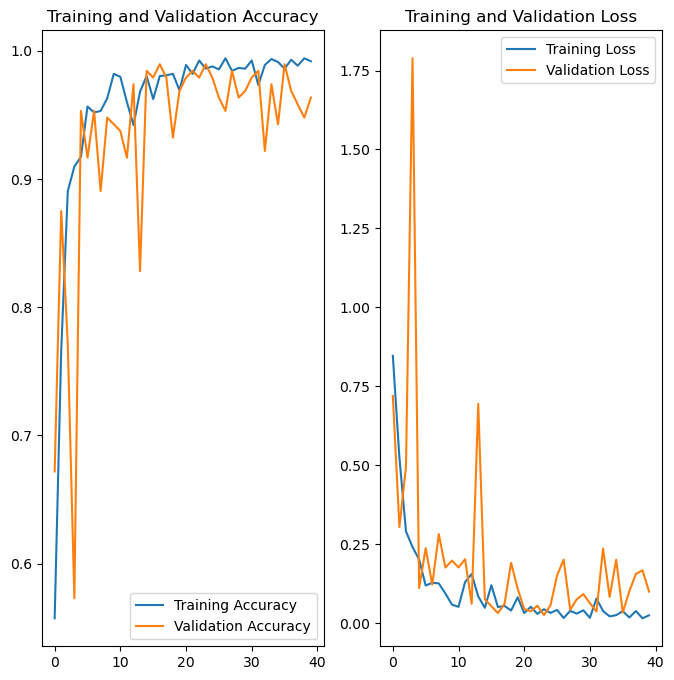

In [245]:
epochs_range = range(EPOCH)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
actual: Potato___Late_blight
prediction: Potato___Early_blight


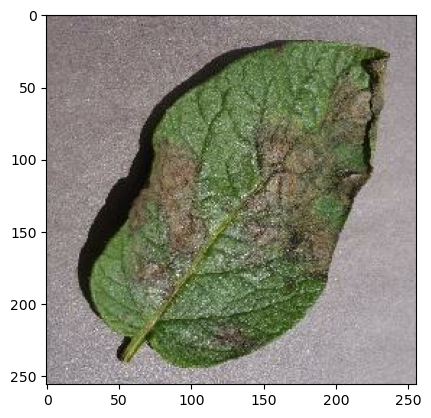

In [246]:
import numpy as np
for images_batch, labels_batch in dataset.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0]
    
    prediction = model.predict(images_batch)
    
    plt.imshow(first_image)
    print("actual:",class_names[first_label])
    print("prediction:",class_names[np.argmax(prediction[0])])

In [247]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


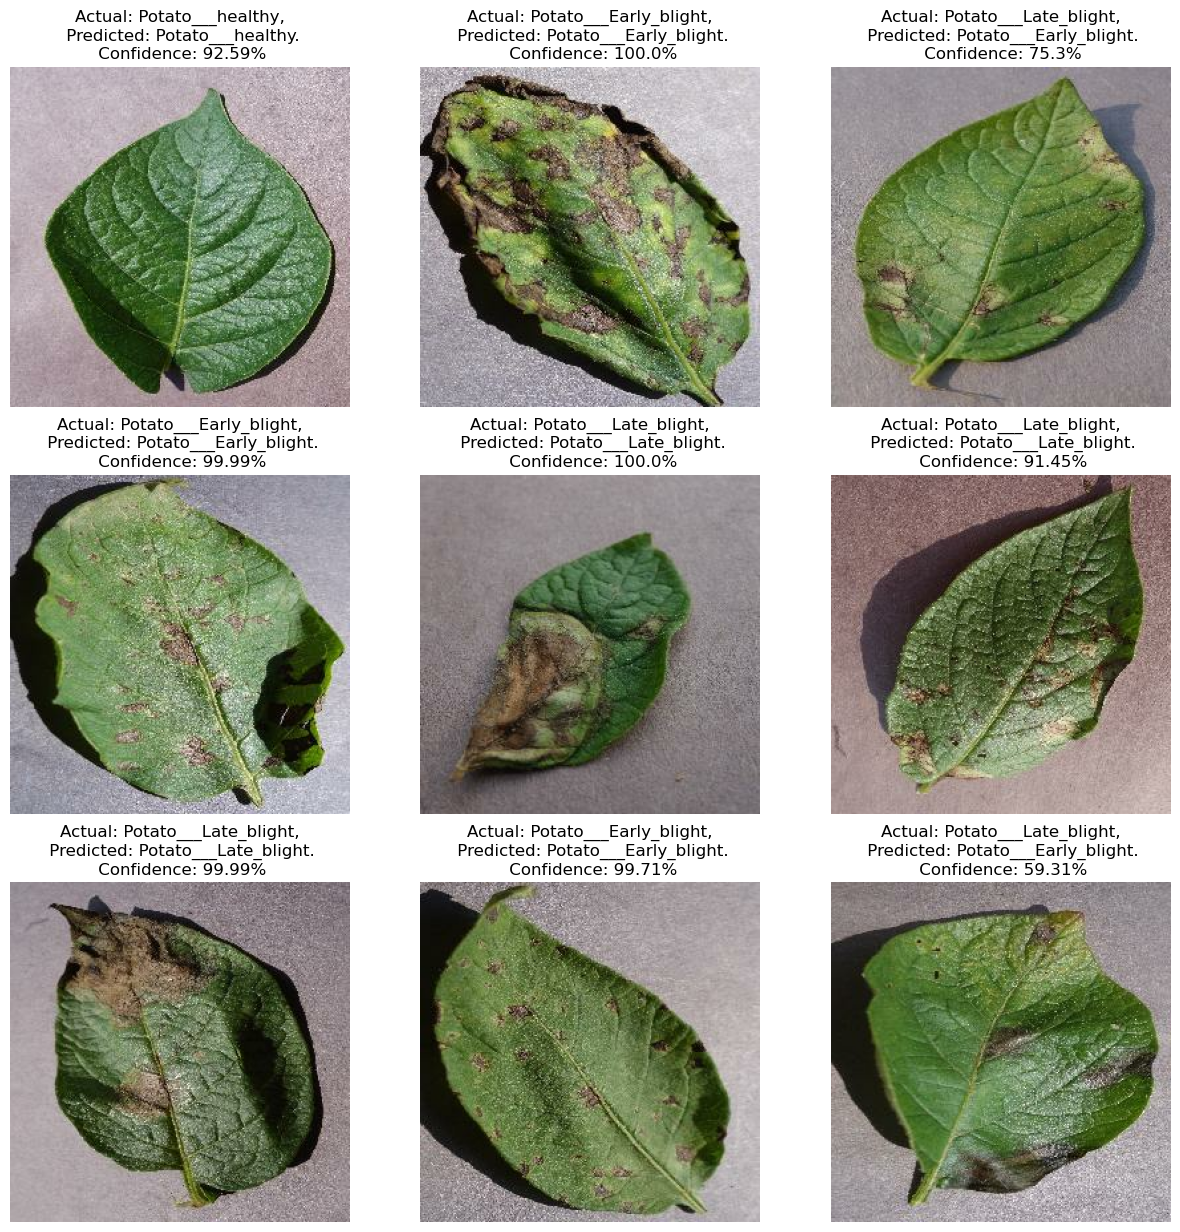

In [248]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [262]:
import os
existing_versions = [
    int(f.split(".")[0]) for f in os.listdir("../saved_models") if f.endswith(".keras")
]
model_version = max(existing_versions + [0]) + 1
model.save(f"../saved_models/{model_version}.keras")

In [2]:
from tensorflow import keras

# Convert 1.keras to SavedModel format
model1 = keras.models.load_model('../saved_models/1.keras')
model1.export('../saved_models/model1/1')

# Convert 2.keras to SavedModel format
model2 = keras.models.load_model('../saved_models/2.keras')
model2.export('../saved_models/model2/1')


INFO:tensorflow:Assets written to: ../saved_models/model1/1\assets


INFO:tensorflow:Assets written to: ../saved_models/model1/1\assets


Saved artifact at '../saved_models/model1/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2206962206672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962207056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962204944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962209168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962208208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962210128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962209552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962210896: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962209360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962211856: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206962211280: TensorSpec

c:\Users\asus\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 34 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


INFO:tensorflow:Assets written to: ../saved_models/model2/1\assets


INFO:tensorflow:Assets written to: ../saved_models/model2/1\assets


Saved artifact at '../saved_models/model2/1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_6')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2206963790672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963793744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963793360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963792400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963792016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963791248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963791632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963791056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206963792976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206986929168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2206986929744: TensorSpec